In [1]:
from utils import (
    load_data,
    train_model,
    evaluate_model,
    load_siRF_result,
)
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [2]:
final_results_new = {}
for name in ["Enhancer_new", "Sim"]:
    for rule in ["and", "or", "add"]:
        for ind in tqdm(range(50)):
            y_pred, y_true = load_siRF_result(i=ind+1, name=name, rule=rule)
            result = evaluate_model(y_pred, y_true, name=name, metric='medium')
            final_results_new[(name, rule, ind, 'siRF')] = result

100%|██████████| 50/50 [00:00<00:00, 153.48it/s]


In [3]:
f1 = {
    'Enhancer_new': 'Enhancer',
    'Sim': 'Gaussian',
}
f2 = {
    'AND': 'Single-component',
    'OR': 'Multi-component',
    'ADD': 'Additive'
}

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.46428571 0.46428571 0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.53571429 0.53571429 0.53571429
 0.57142857 0.64285714 0.64285714 0.67857143 0.71428571 0.75
 0.75       0.75      ]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. nan]
[0.98 0.98 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.  ]
[0.5        0.51282051 0.51282051 0.51282051 0.88461538 0.91025641
 0.91025641 0.92307692 0.93589744 0.96153846 0.96153846 0.96153846
 0.96153846 0.96153846 0.98717949 0.98717949 0.98717949 1.
 1.         1.        ]


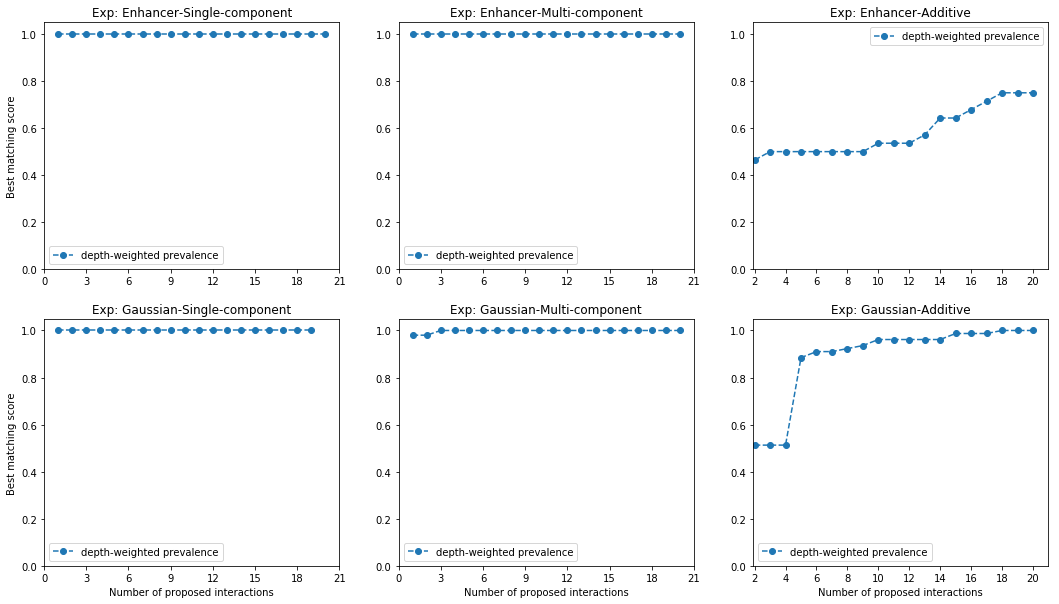

In [4]:
fig, axes = plt.subplots(2,3, figsize=(18,10), sharey=False)
for i, name in enumerate(["Enhancer_new", 'Sim']):
    for j, rule in enumerate(["and", "or", "add"]):
        try:
            ax = axes[i][j]
            min_length = np.min([len(v) for x, v in final_results_new.items() if x[0] == name and x[1] == rule])
            min_length = min(40, min_length)
            min_length = 20
            
            
            # sample size weighted
            
            #scores = []
            #for x, v in final_results.items():
            #    if x[0] == name and x[1] == rule and x[-1] == 'samplesize':
            #        if len(v) < min_length:
            #            v = list(v) + [np.nan] * (min_length - len(v))
            #        scores.append(v[:min_length])
            #scores = np.array(scores)
            #ax.errorbar(
            #    np.arange(1, min_length+1),
            #    np.nanmean(scores, axis=0),
            #    #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
            #)
            
            # siRF
            
            scores = []
            for x, v in final_results_new.items():
                if x[0] == name and x[1] == rule and x[-1] == 'siRF':
                    if len(v) < min_length:
                        v = list(v) + [np.nan] * (min_length - len(v))
                    scores.append(v[:min_length])
            scores = np.array(scores)
            ax.errorbar(
                np.arange(1, min_length+1),
                np.nanmean(scores, axis=0),
                linestyle='dashed', marker='o',
                #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
            )
            print(np.nanmean(scores, axis=0))
            ax.set_ylim([0,1.05])
            if rule == 'add':
                ax.set_xlim([1.9, 21])
            else:
                ax.set_xlim([0, 21])
            ax.legend(['depth-weighted prevalence', 'siRF'])
            ax.set_title("Exp: " + f1[name] + "-" + f2[rule.upper()])
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            if (i == 0 and j == 0) or (i == 1 and j == 0):
                ax.set_ylabel("Best matching score")
            if (i == 1):
                ax.set_xlabel("Number of proposed interactions")
        except e:
            pass

In [14]:
np.nanmean(scores, axis=0)

array([0.34615385, 0.41452991, 0.44871795, 0.5042735 , 0.78461538,
       0.79594017, 0.80021368, 0.89957265, 0.91773504, 0.94123932,
       0.94551282, 0.95405983, 0.95405983, 0.95405983, 0.96474359,
       0.96474359, 0.96474359, 0.97435897, 0.97863248, 0.97863248])

In [9]:
import pickle
with open("result_whole_with_bootstrap.pickle", 'rb') as f:
    final_results = pickle.load(f)

In [10]:
for key in final_results_new:
    final_results[key] = final_results_new[key]

In [14]:
## save the result
import pickle
with open("result_" + "whole_with_bootstrap" + ".pickle", 'wb') as f:
    pickle.dump(final_results, f)